In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from my_func_pkg import *

In [2]:
btc_dt = yf.download('BTC-USD', interval='1D')

[*********************100%%**********************]  1 of 1 completed


In [3]:
btc_df = btc_dt.loc[:, ['Open', 'High', 'Low', 'Close']]

In [4]:
btc_df

,Open,High,Low,Close
Date,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2024-03-04,63137.003906,68537.031250,62386.519531,68330.414062
2024-03-05,68341.054688,69170.625000,59323.910156,63801.199219
2024-03-06,63776.050781,67637.929688,62848.671875,66106.804688


In [5]:
y = btc_df.Close.values
x = np.arange(len(btc_df.Close))

In [6]:
x_train = x[:3400]
y_train = y[:3400]
x_test = x[3400:]
y_test = y[3400:]

In [5]:
sm = build_exp_smooth_trend(btc_df)

In [6]:
ft = build_exp_fit(btc_df)

In [7]:
sm2 = build_exp_smooth_final_fit(btc_df)

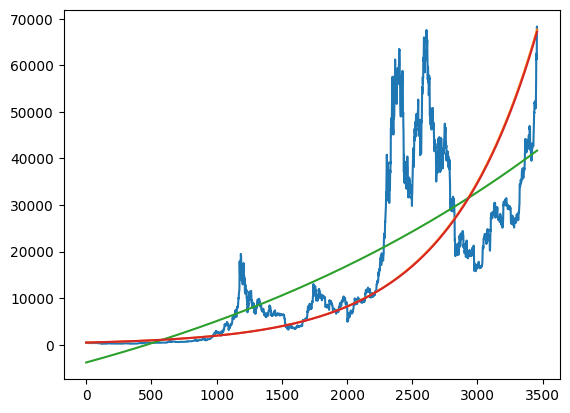

In [8]:
plt.plot(btc_dt.Close.values)
plt.plot(sm[3])
plt.plot(ft[3])
plt.plot(sm2[:, 3])

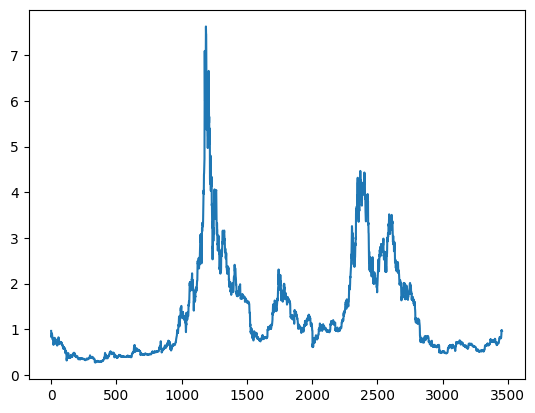

In [9]:
plt.plot(btc_dt.Close.values / sm2[:, 3])

In [8]:
res = residual(btc_df)

In [9]:
res[0][3]

0       1.000000
1       0.926755
2       0.860802
3       0.890295
4       0.867107
          ...   
3449    0.881304
3450    0.921420
3451    1.007461
3452    0.985002
3453    1.000000
Name: 3, Length: 3454, dtype: float64

In [10]:
res[1][3]

0      -0.121645
1      -0.113125
2      -0.105438
3      -0.109429
4      -0.106949
          ...   
3449    1.317530
3450    1.378774
3451    1.508914
3452    1.476638
3453    1.500507
Name: 3, Length: 3454, dtype: float64

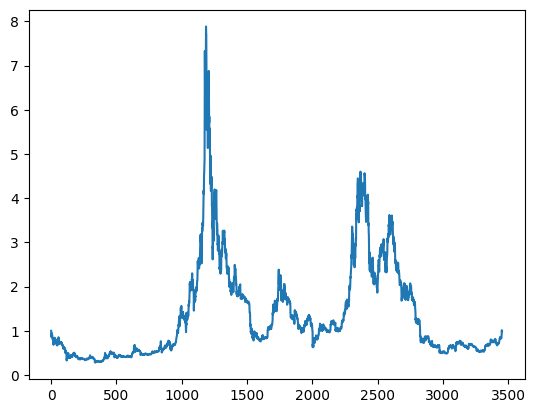

In [11]:
plt.plot(res[0][3])
#plt.plot(res[1][3])

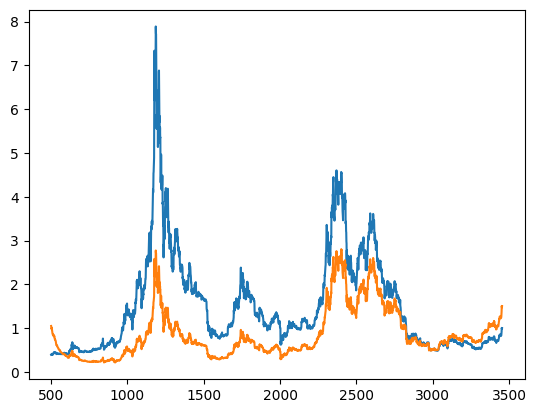

In [12]:
plt.plot(res[0][3][501:])
plt.plot(res[1][3][501:])

In [13]:
res[1][3].describe()

count    3454.000000
mean        1.330951
std        36.550839
min       -51.559399
25%         0.338429
50%         0.625212
75%         0.957182
max      2146.561580
Name: 3, dtype: float64

In [8]:
x_8 = key_points(x, y, 30, 200)[2]

In [7]:
x_8

array([1301, 2494, 1152,  413,  449, 1910,  551, 1060,  673, 2893, 2028,
        152, 1749, 3194, 3430,  735, 1230, 2388, 3108, 2277,  750, 2536,
         57, 3334,  226, 3081, 1796, 1455])

In [8]:
y_8 = y[x_8]

In [9]:
z = build_from_sample_all_data(x_8, y_8, x, y)

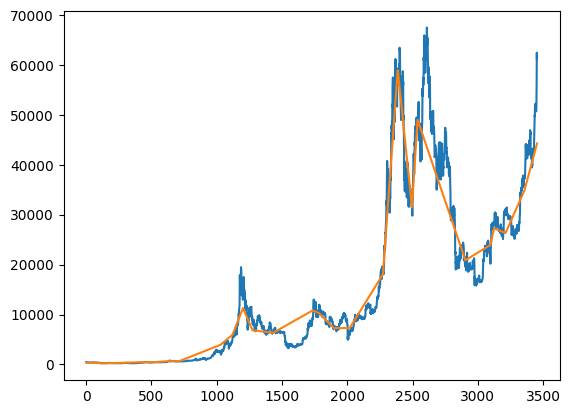

In [10]:
plt.plot(y)
plt.plot(z)

In [11]:
err = auto_interpolation_fit(x, y)

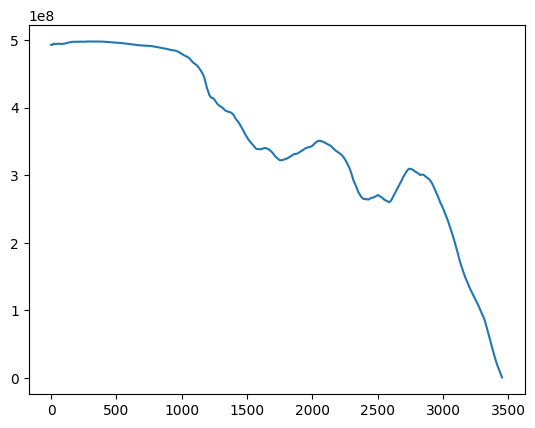

In [12]:
plt.plot(err)

In [16]:
k_i = key_index(err, 60, 100)

In [17]:
y_k_i = build_from_sample_all_data(k_i, err[k_i], np.arange(len(err)), err)

In [26]:
k_i

array([1808,  936, 2532, 2306, 1537, 2085, 2060,  467, 2322, 2699, 1911,
       1492, 1008,  859,   38,  539,  605, 3402, 3241, 1601,  974,  393,
        228,  185, 2995, 3140, 3129, 2874,  364, 1375,  109, 1154, 2226,
       1128, 1946, 1358,  497, 1377,  793, 3304, 1499, 2307,  893, 1947,
        632, 3395, 2553, 2373, 2169, 1200, 3090, 2983, 2794,    8, 3444])

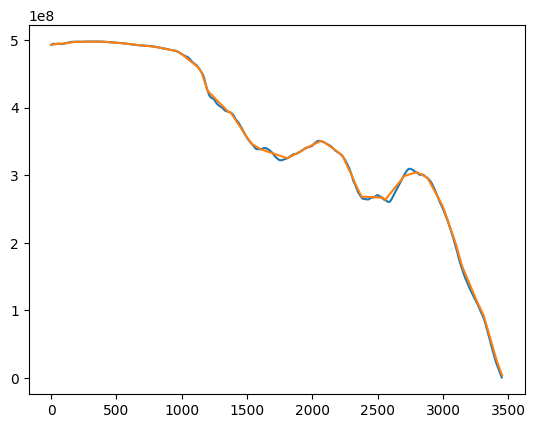

In [18]:
plt.plot(err[2:])
plt.plot(y_k_i)

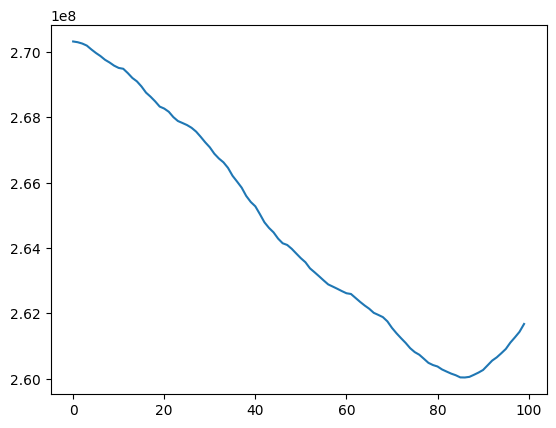

In [27]:
plt.plot(err[2500:2600])

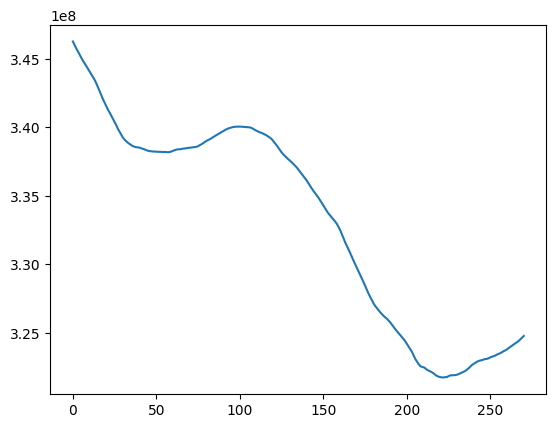

In [20]:
plt.plot(err[1537:1808])

In [28]:
build_from_sample_all_data(x[:2553], y[:2553], x, y, kind='adj')

array([  488.08375156,   462.13826674,   437.85120259, ...,
       48078.62552236, 48480.65919311, 49160.42251392])

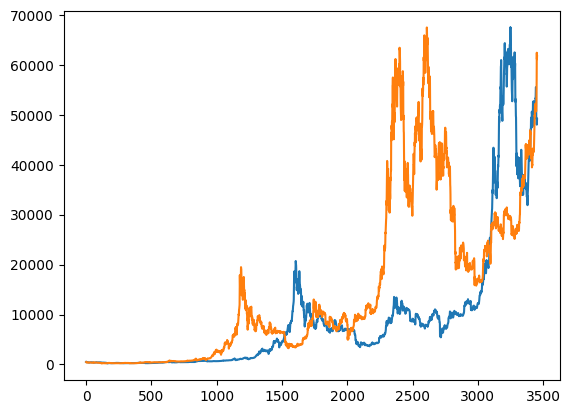

In [30]:
plt.plot(build_from_sample_all_data(x[:2553], y[:2553], x, y, kind='adj'))
plt.plot(y)

In [6]:
#a = sample_fractal_on_all_data(x, y, 50, optimal_iter=False)

In [8]:
a = optimal_points_sample_fractal(x_train, y_train, 500)

100%|██████████| 498/498 [20:46<00:00,  2.50s/it]


In [9]:
len(a)

500

In [17]:
#pd.DataFrame(a[1]).to_excel('const_points.xlsx')

In [18]:
#a=pd.read_excel('const_points.xlsx').values

In [19]:
#z1 = build_from_sample_all_data(a[1][-1], y[a[1][-1]], x, y, kind='adj')

In [20]:
#z1 = build_from_sample_all_data(a[-1], y[np.int_(a[-1])], x, y, kind='adj')

In [22]:
z1 = build_from_sample_all_data_feature(a, y[a], x)

In [23]:
#z1 = build_from_sample_all_data(a, y[a], x, y, kind='adj')

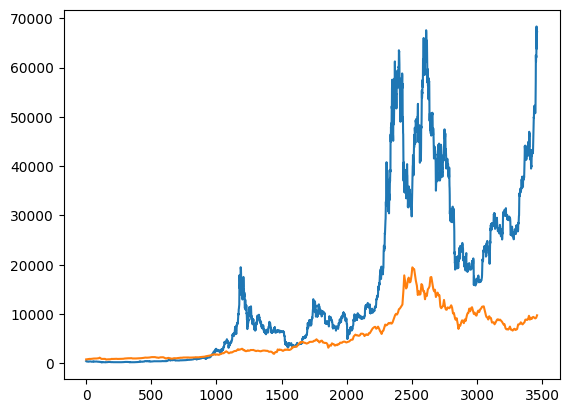

In [24]:
plt.plot(y)
plt.plot(z1)

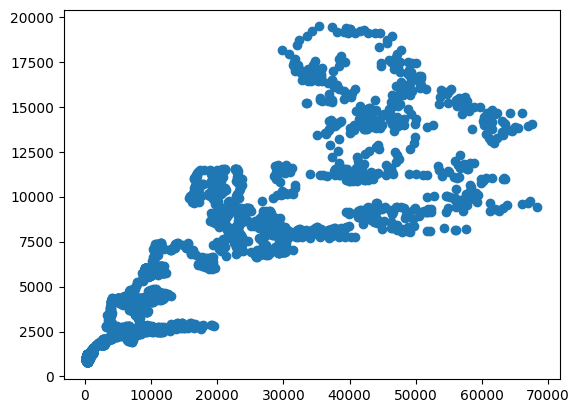

In [25]:
plt.scatter(y, z1)

In [16]:
obj1=Interpolate_Predective()

In [17]:
obj1.__int__(x,y)

In [18]:
obj1.fit(x_train,y_train,0.1)

100%|██████████| 338/338 [11:07<00:00,  1.98s/it]


In [10]:
c=obj1.predict_linear(x)

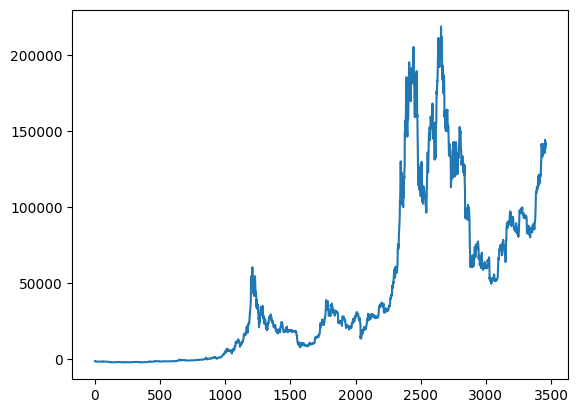

In [11]:
plt.plot(c)

In [12]:
d=obj1.predict_interpolate(x)

 56%|█████▌    | 188/338 [06:18<05:02,  2.01s/it]


KeyboardInterrupt: 

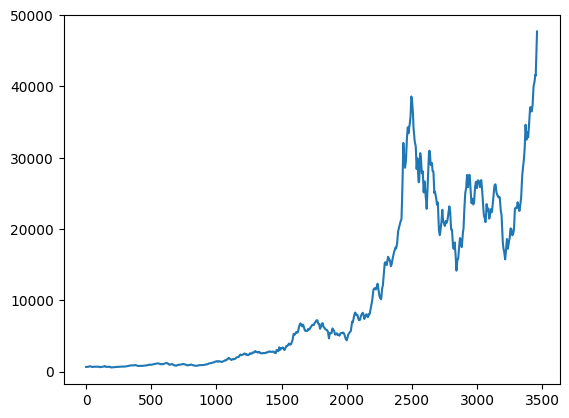

In [56]:
plt.plot(d)

In [19]:
e=obj1.predict_final(x)

100%|██████████| 338/338 [11:04<00:00,  1.97s/it]


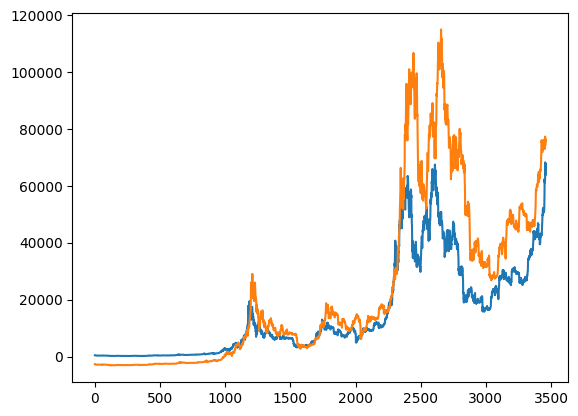

In [20]:
plt.plot(y)
plt.plot(e)

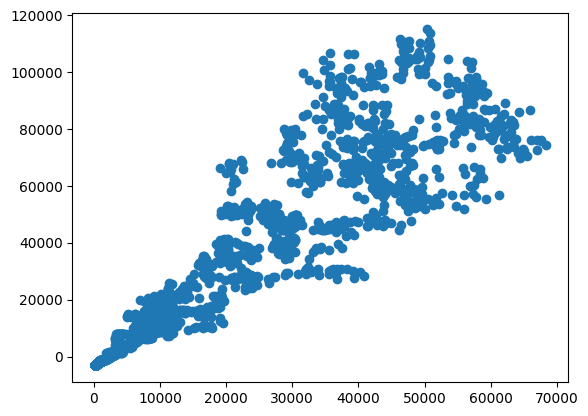

In [21]:
plt.scatter(y,e)

In [22]:
np.corrcoef(y,e)

array([[1.        , 0.93959836],
       [0.93959836, 1.        ]])